# Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Downloading Dataset

In [2]:
df=pd.read_csv("/content/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

Changing column name from ring to age(add 1.5)

In [4]:
age=1.5+df.Rings
df["Age"]=age
df=df.drop(columns=["Rings"],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Visualizations

### Univariate Analysis

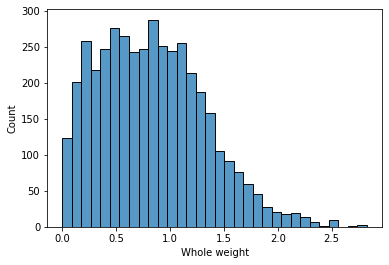

In [5]:
sns.histplot(df["Whole weight"])

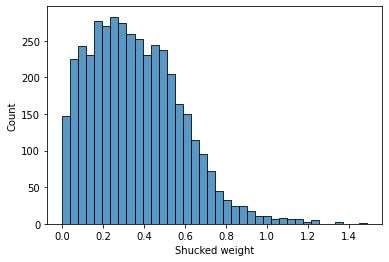

In [6]:
sns.histplot(df["Shucked weight"])

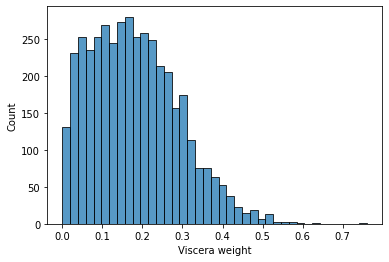

In [7]:
sns.histplot(df["Viscera weight"])

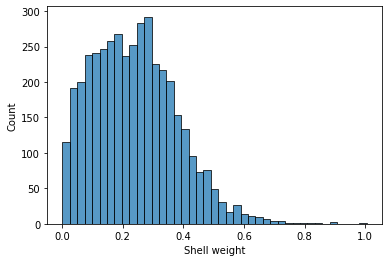

In [8]:
sns.histplot(df["Shell weight"])

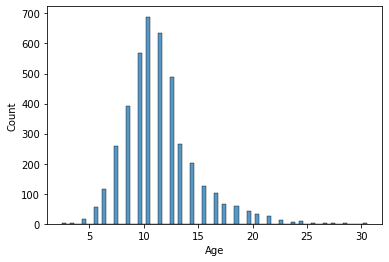

In [9]:
sns.histplot(df["Age"])


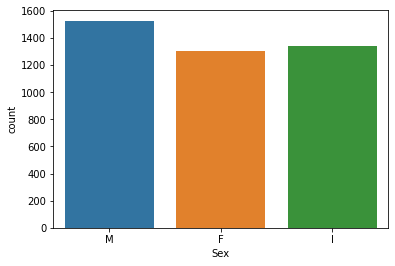

In [10]:
sns.countplot(x=df.Sex) 

### Bi-Variate Analysis

#### BarPlot

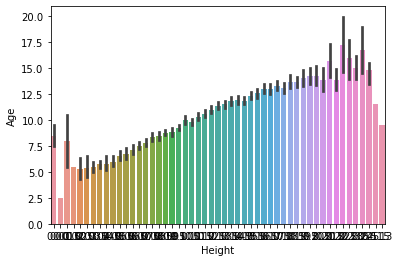

In [11]:
sns.barplot(x=df.Height,y=df.Age)

#### Linearplot

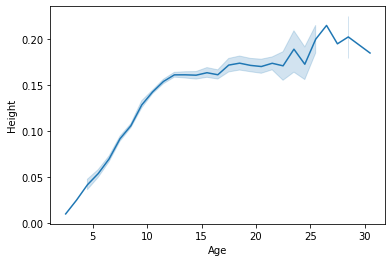

In [12]:
sns.lineplot(x=df.Age,y=df.Height)

#### Scatterplot


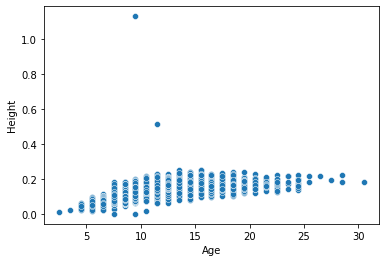

In [13]:
sns.scatterplot(x=df.Age,y=df.Height)

#### Pointplot

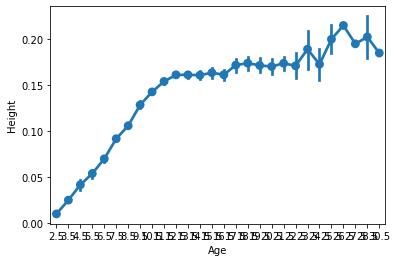

In [14]:
sns.pointplot(x=df.Age, y=df.Height) 

#### Regplot

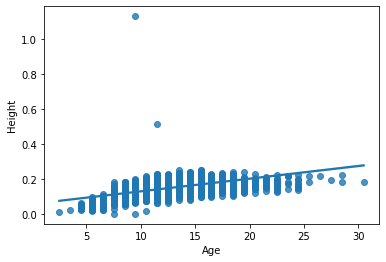

In [15]:
sns.regplot(x=df.Age,y=df.Height) 

### Multi-Variate Analysis

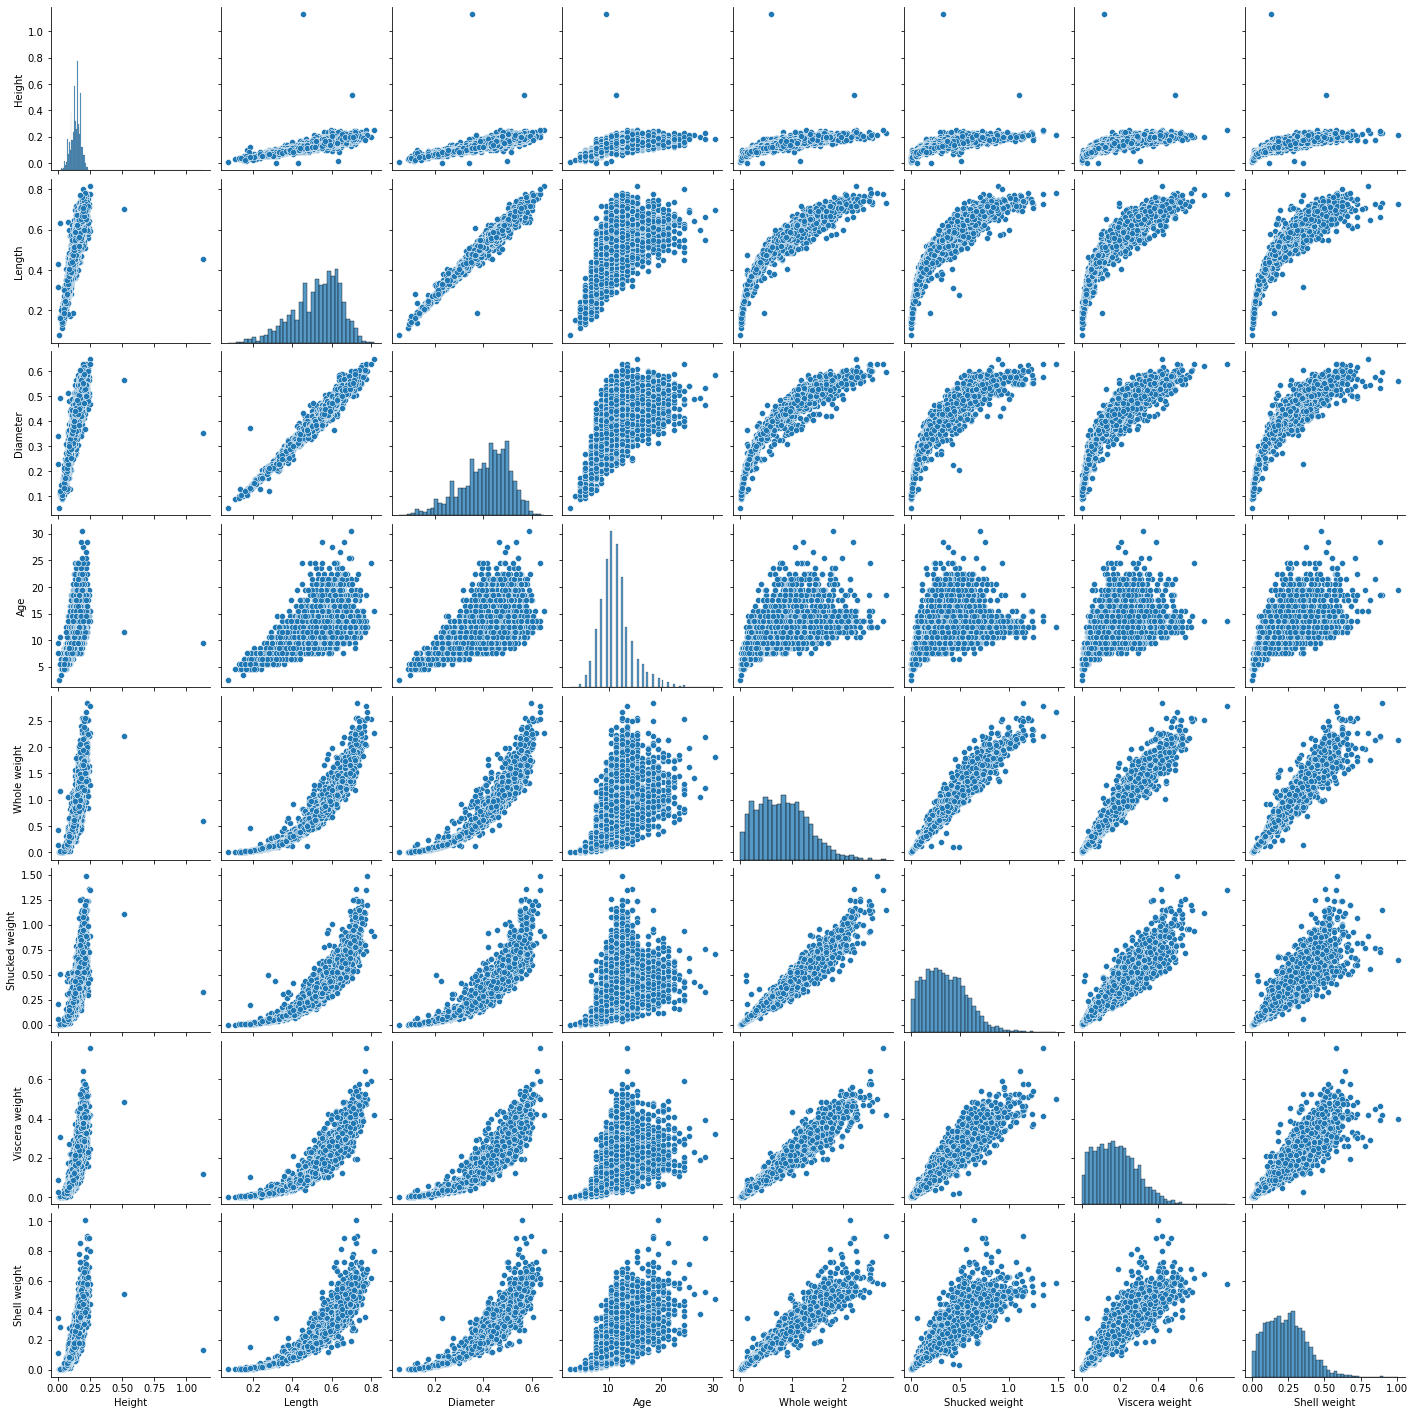

In [16]:
sns.pairplot(data=df[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]])

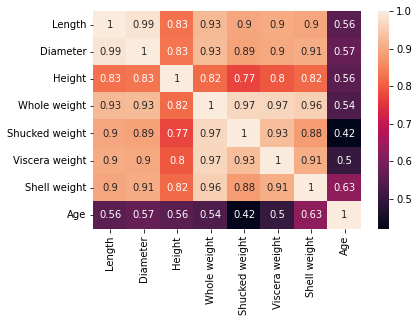

In [17]:
sns.heatmap(df.corr(),annot=True)

### Perform descriptive statistics on the dataset


In [18]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


### Check for Missing values and deal with them.

In [20]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

### Find the outliers and replace them outliers

In [21]:
qnt = df.quantile(q=(0.25, 0.75))

In [22]:
iqr = qnt.loc[0.75] - qnt.loc[0.25]
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Age               3.0000
dtype: float64

In [23]:
upper = qnt.loc[0.75] + 1.5*iqr
upper

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Age               17.00000
dtype: float64

In [24]:
lower =qnt.loc[0.25] - 1.5*iqr
lower

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Age               5.00000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


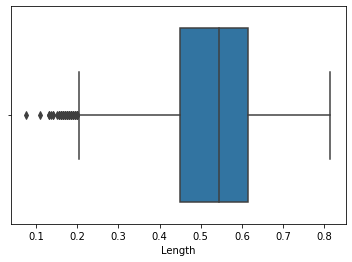

In [25]:
sns.boxplot(df["Length"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


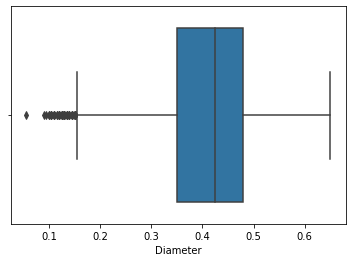

In [26]:
sns.boxplot(df["Diameter"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


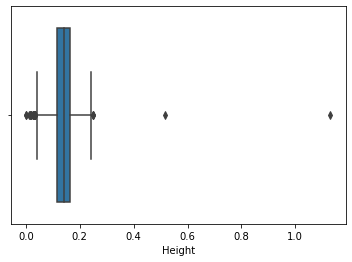

In [27]:
sns.boxplot(df["Height"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


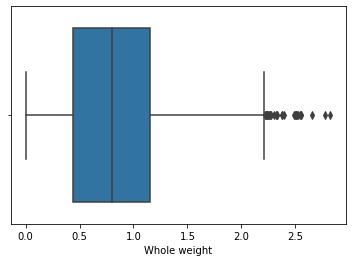

In [28]:
sns.boxplot(df["Whole weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


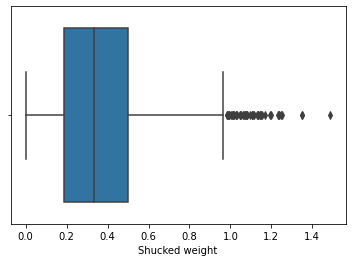

In [29]:
sns.boxplot(df["Shucked weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


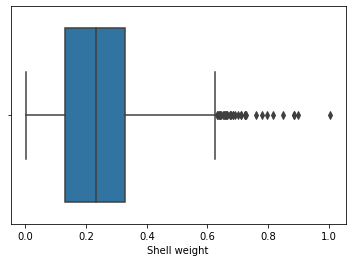

In [30]:
sns.boxplot(df["Shell weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


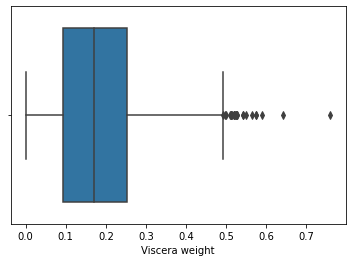

In [31]:
sns.boxplot(df["Viscera weight"])

#### Replacing outliers

In [32]:
df["Length"] = np.where(df["Length"]<0.25,0.55,df['Length']) 
df["Diameter"] = np.where(df["Diameter"]<0.2,0.4,df['Diameter']) 
df["Height"] = np.where(df["Height"]>0.23,0.15,df['Height'])
df["Whole weight"] = np.where(df["Whole weight"]>2.0,0.7,df['Whole weight']) 
df["Shucked weight"] = np.where(df["Shucked weight"]>0.8,0.3,df['Shucked weight'])
df["Shell weight"] = np.where(df["Shell weight"]>0.6,0.21,df['Shell weight'])
df["Viscera weight"] = np.where(df["Viscera weight"]>0.4,0.18,df['Viscera weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


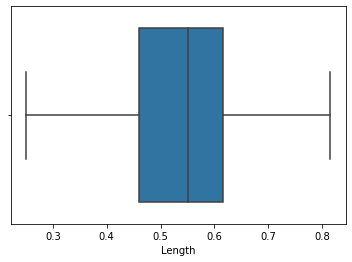

In [33]:
sns.boxplot(df["Length"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


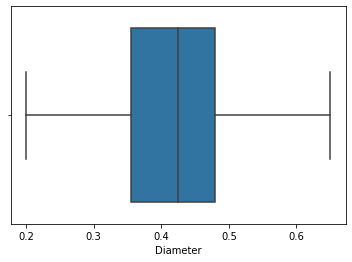

In [34]:
sns.boxplot(df["Diameter"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


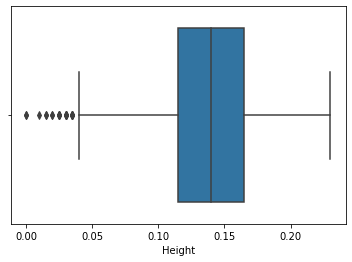

In [35]:
sns.boxplot(df["Height"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


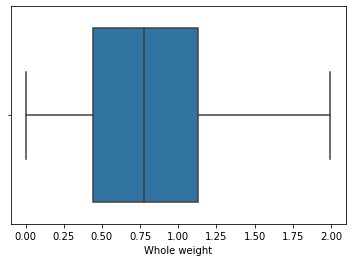

In [36]:
sns.boxplot(df["Whole weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


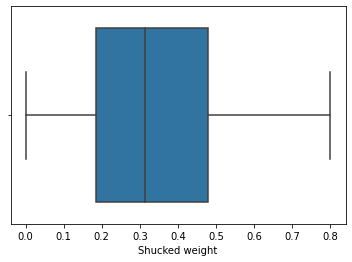

In [37]:
sns.boxplot(df["Shucked weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


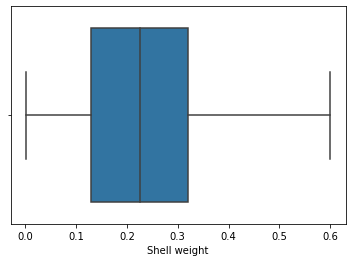

In [38]:
sns.boxplot(df["Shell weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


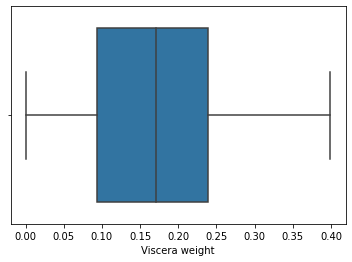

In [39]:
sns.boxplot(df["Viscera weight"])

### Check for Categorical columns and perform encoding

In [40]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [41]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
df.Sex = lab.fit_transform(df.Sex)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


0-Female
1-Infant 
2-Male

# Splitting dependent and independent variable

In [42]:
x=df.drop(columns=["Age"],axis=1)
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [43]:
y=df["Age"]
y= pd.DataFrame(y)
y

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5
...,...
4172,12.5
4173,11.5
4174,10.5
4175,11.5


# Scale the independent variable


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[1.        , 0.36283186, 0.36666667, ..., 0.27972466, 0.25219573,
        0.2481203 ],
       [1.        , 0.17699115, 0.14444444, ..., 0.1232791 , 0.12045169,
        0.1144528 ],
       [0.        , 0.49557522, 0.48888889, ..., 0.31977472, 0.35382685,
        0.34837093],
       ...,
       [1.        , 0.61946903, 0.61111111, ..., 0.65644556, 0.72020075,
        0.51211362],
       [0.        , 0.66371681, 0.63333333, ..., 0.66332916, 0.65370138,
        0.49206349],
       [1.        , 0.81415929, 0.78888889, ..., 0.37421777, 0.94353827,
        0.8245614 ]])

# Splitting training and testing data

In [45]:
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=0)

# Build the Model

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor()

# Train the model

In [48]:
rf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

# Test the model

In [49]:
y_predict = rf.predict(x_Test)

In [50]:
y_Test

,Age
668,14.5
1580,9.5
3784,12.5
463,6.5
2615,13.5
...,...
575,12.5
3231,13.5
1084,8.5
290,18.5


In [51]:
y_predict

array([15.11      , 10.05      , 12.45      ,  6.41      , 13.2       ,
       12.79      ,  8.69      ,  9.75      ,  8.82      , 11.37      ,
        9.77      ,  8.79      , 11.87      , 10.57      ,  6.34      ,
        9.17      ,  9.59      , 18.08      ,  9.6       ,  8.8       ,
        8.61      ,  7.08      ,  9.8       , 10.05      , 11.61      ,
       11.92      ,  6.32      , 16.41      , 11.87      , 15.69      ,
        9.87      ,  5.47      , 11.41      , 14.09      ,  8.17      ,
        8.87      ,  9.86      , 10.92      ,  9.39      , 12.5       ,
       15.28      , 12.87      , 17.21      , 16.32      , 13.02      ,
       12.29      ,  9.87      , 12.52      , 13.98      ,  8.24      ,
       13.85      ,  8.31      , 13.02      , 19.69      , 12.13      ,
        8.6       ,  8.52      , 10.69      ,  8.31      ,  8.44      ,
       10.67      , 10.48      , 12.24      ,  9.18      ,  8.58      ,
       13.38      , 14.03      , 16.65      ,  9.78      , 14.07

# Measure the performance using Metrics.

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
print("MSE:", mean_squared_error(y_Test, y_predict))
print("R2:", r2_score(y_Test, y_predict))

MSE: 0.6663010499734183
R2: 0.9386480697783752
